<a href="https://colab.research.google.com/github/JoyMuthoniNjeru/AI-Coursework-2025/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GROUP 4: BRAINSTACK:)

In [ ]:
#QN1: Upload dataset
import pandas as pd
df = pd.read_csv("/content/aircrush dataset.zip")

In [ ]:
#QN2: Number of rows and columns
rows, cols = df.shape
print(f"The dataset contains {rows} rows and {cols} columns.\n")

The dataset contains 5268 rows and 13 columns.



In [ ]:
#QN3: The last 75 rows
print("The last 75 rows in the dataset are: \n")
df.tail(75)

The last 75 rows in the dataset are: 



,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [ ]:
#QN4: handling missing data
df.isna().sum()

,0
Date,0
Time,2219
Location,20
Operator,18
Flight #,4199
Route,1707
Type,27
Registration,335
cn/In,1228
Aboard,22


Handling Missing Data

After inspecting missing values using, most columns except 'Date' have missing data.  
The following treatments were chosen:

- Categorical columns (like Operator, Location, Type) can be filled with "Unknown" or their most frequent value (mode) to retain all records and ensure consistency.  
- Numeric columns (Aboard, Fatalities, Ground) can be filled using mean or median values to avoid distorting numeric summaries.  
- Text-based columns like 'Summary' can be filled with "Not available" since they contain descriptive, non-critical information.  
- Columns such as 'Route' or 'Registration' may be dropped if they are too incomplete or irrelevant for the fatality analysis.

This approach preserves the dataset’s completeness while maintaining statistical accuracy for future analysis.





In [ ]:
#QN5. New dataframe from the raw/uncleaned data
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']]
fatality_locations.head()

,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


In [ ]:
#QN6. Date w highest number of fatalities from new dataset
max_fatalities =  fatality_locations['Fatalities'].max()

deadliest_crash = fatality_locations[fatality_locations['Fatalities']==max_fatalities]

deadliest_crash

,Date,Location,Aboard,Fatalities
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0


In [ ]:
#QN7a. Compare number of passanger aboard to number of fatalities
fatality_locations[['Aboard', 'Fatalities']]

,Aboard,Fatalities
0,2.0,1.0
1,5.0,5.0
2,1.0,1.0
3,20.0,14.0
4,30.0,30.0
...,...,...
5263,112.0,98.0
5264,4.0,4.0
5265,228.0,228.0
5266,1.0,1.0


In [ ]:
#QN7b. Any recorded crashes where there were no fatalities. If so how many?

no_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0]


no_fatality_count = no_fatalities.shape[0]


print("Number of crashes with no fatalities:", no_fatality_count)
no_fatalities.head()

Number of crashes with no fatalities: 58


,Date,Location,Aboard,Fatalities
108,10/21/1926,English Channel,12.0,0.0
387,03/05/1936,"Near Tengya, China",6.0,0.0
889,10/08/1947,"Near El Paso, Texas",54.0,0.0
897,11/11/1947,"Gallup, New Mexico",25.0,0.0
1265,05/25/1953,"Amsterdam, Netherlands",34.0,0.0


In [ ]:
#QN8.  Split colums to have 2 columns of regions and states/countries

fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()

fatality_locations[['Region', 'Country']] = fatality_locations['Location'].str.split(',', n=1, expand=True)

fatality_locations.head()

,Date,Location,Aboard,Fatalities,Region,Country
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0,Fort Myer,Virginia
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0,AtlantiCity,New Jersey
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0,Victoria,"British Columbia, Canada"
3,09/09/1913,Over the North Sea,20.0,14.0,Over the North Sea,None
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0,Near Johannisthal,Germany


In [ ]:
#QN9 Sort data by muber of fatalities, from highest to lowest and show top 100 records

fatality_locations_sorted = fatality_locations.sort_values(by='Fatalities', ascending=False)

top_100_fatalities = fatality_locations_sorted.head(100)

top_100_fatalities.head(100)

,Date,Location,Aboard,Fatalities,Region,Country
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0,Tenerife,Canary Islands
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0,Mt. Osutaka,"near Ueno Village, Japan"
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0,Near Charkhidadri,India
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0,Near Ermenonville,France
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0,AtlantiOcean,110 miles West of Ireland
...,...,...,...,...,...,...
4852,04/15/2002,"Busan, South Korea",166.0,128.0,Busan,South Korea
3198,01/21/1980,"Elburz Mtns., near Laskarak, Markazi, Iran",128.0,128.0,Elburz Mtns.,"near Laskarak, Markazi, Iran"
1701,12/16/1960,"Staten Island / Brooklyn, New York",128.0,128.0,Staten Island / Brooklyn,New York
5108,07/09/2006,"Irkutsk, Russia",203.0,128.0,Irkutsk,Russia


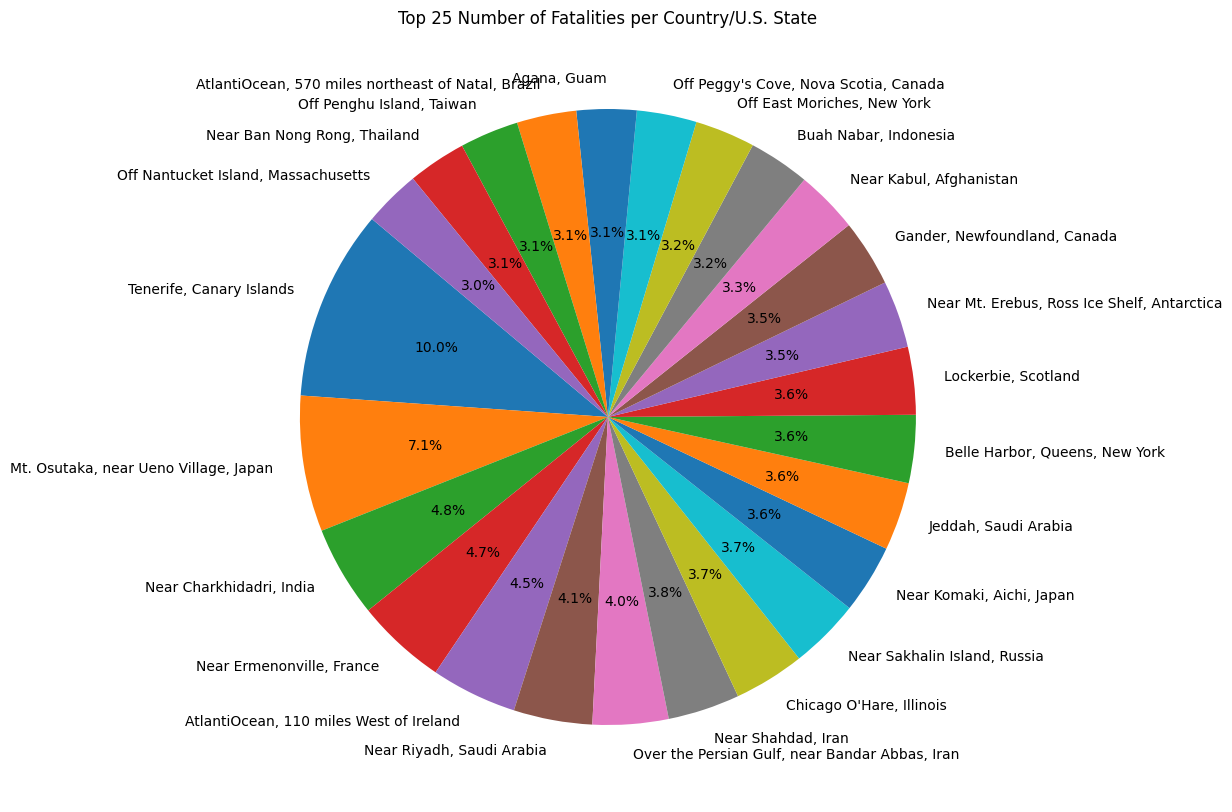

In [ ]:
#QN10. Generate a pie chart showing the distribution of the top 25 number of fatalities per country/U.S. state

import matplotlib.pyplot as plt
location_fatalities = top_100_fatalities.groupby('Location')['Fatalities'].sum().sort_values(ascending=False).head(25)

# Plot the pie chart
plt.figure(figsize=(10,10))
plt.pie(location_fatalities, labels=location_fatalities.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 25 Number of Fatalities per Country/U.S. State')
plt.show()



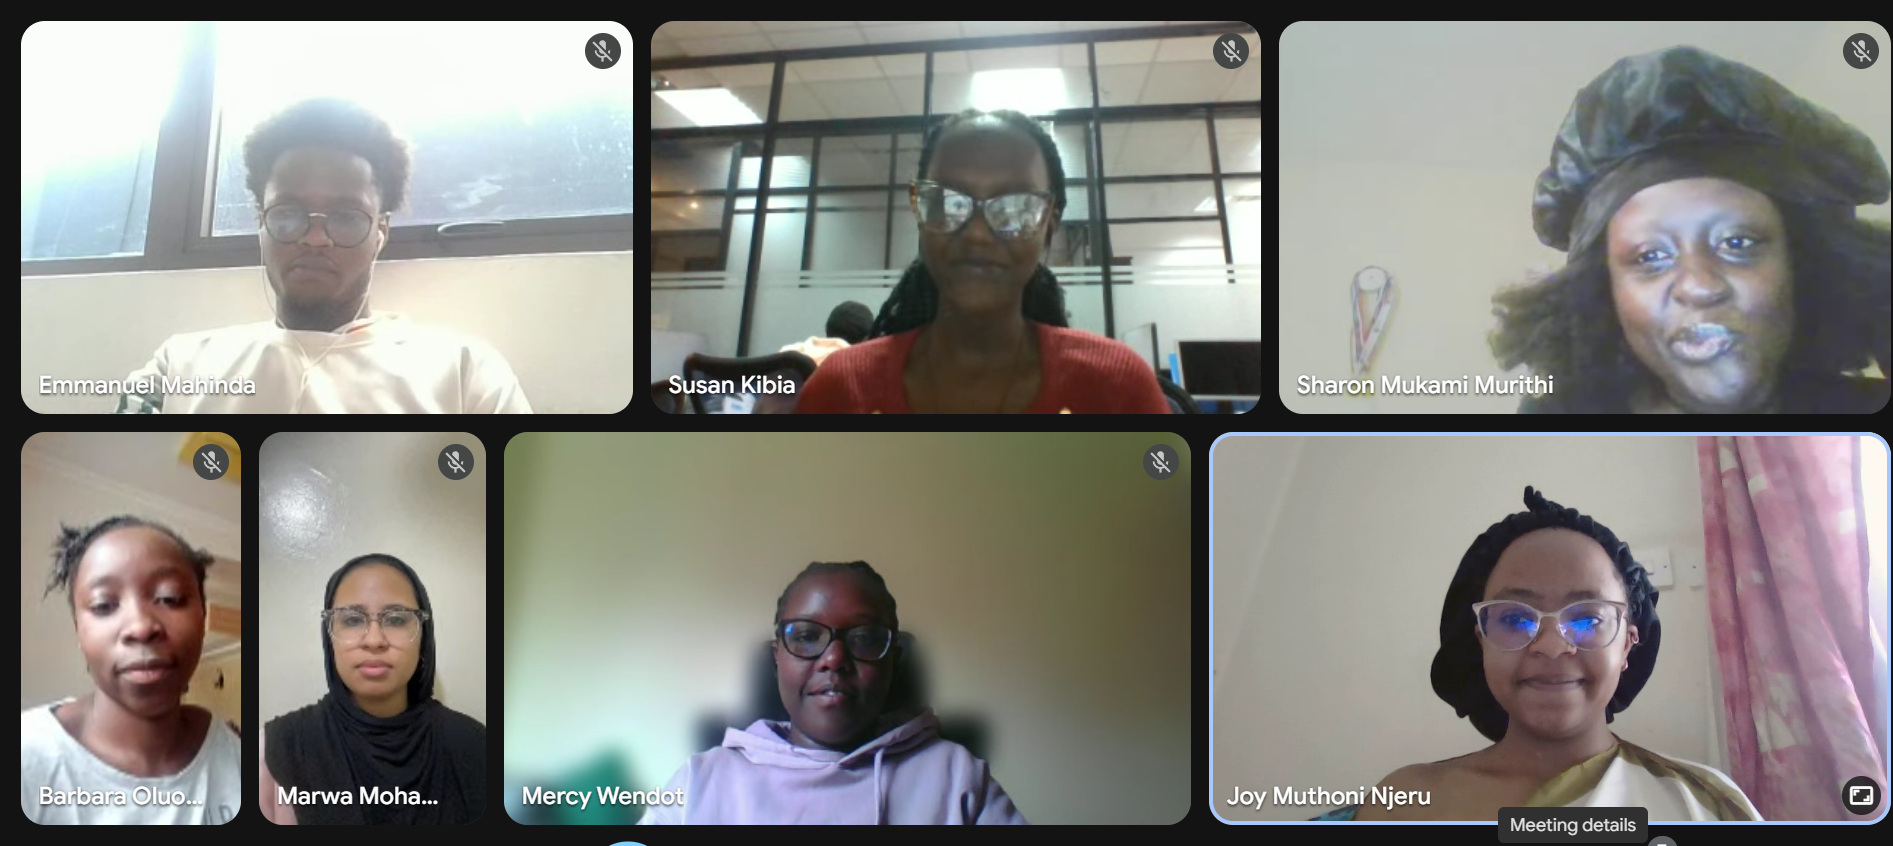